# measuring latency of the memory Hierarchy

## Import modules

In [2]:
# Enable automiatic reload of libraries
%load_ext autoreload
%autoreload 2 # means that all modules are reloaded before every command

%pylab inline
from numpy import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
import time
from matplotlib.backends.backend_pdf import PdfPages

from os.path import isfile,isdir
from os import mkdir
import os

## Keeping the notebook neat
* Code in notebook is usually linear, one damn line after another.
* Better for modularity to define functions and classes.
* Better for readability to keep large functions in separate python files.

In [4]:
import sys
sys.path.append('./lib')
from measureRandomAccess import measureRandomAccess
from PlotTime import PlotTime
from create_file import create_file,tee

#### If you have a doc_string for your methods, 
You can retrieve it by putting `?` after the method name

In [4]:
create_file?

#### In any case, you can load the python file as a cell
After you make changes, you can store it back using the magic

`%%writefile filename.py`

In [5]:
# %load lib/create_file.py


## setting parameters
* We test access to arrays whose size is a multiple of 1MB. `n` is the block size.
* `m_list` defines the size of the arrays we test, in multiples of block-size.
* `k` defines the number of memory accesses.

In [5]:
n=1000000 # size of single block (1MB)
m_list=[1,10,100,1000,10000] # size of file in blocks
k=100000;  # number of repeats
L=len(m_list)
print 'n=%d, k=%d, m_list='%(n,k),m_list

n=1000000, k=100000, m_list= [1, 10, 100, 1000, 10000]


## Set working directory
This script generates large files. We put these files in a separate directory so it is easier to delete them later.

In [6]:
log_root='./logs'
if not isdir(log_root): mkdir(log_root)
TimeStamp=str(int(time.time()))
log_dir=log_root+'/'+TimeStamp
mkdir(log_dir)
%cd $log_dir
stat=open('stats.txt','w')

def tee(line):
    print line
    stat.write(line+'\n')

/Users/yoavfreund/projects/edX-Micro-Master-in-Data-Science/big-data-analytics-using-spark/notebooks/0.MemoryLatency/public/logs/1490849133


In [6]:
mean=zeros([2,L])   #0: using disk, 1: using memory
std=zeros([2,L])
T=zeros([2,L,k])

In [7]:
for m_i in range(len(m_list)):
    
    m=m_list[m_i]
    (t_mem,t_disk) = create_file(n,m,filename='BlockData'+str(m))

    (mean[0,m_i],std[0,m_i],T[0,m_i]) = measureRandomAccess(n*m,filename='BlockData'+str(m),k=k)
    tee('File pokes mean='+str(mean[0,m_i])+', file std='+str(std[0,m_i]))

    (mean[1,m_i],std[1,m_i],T[1,m_i]) = measureRandomAccess(n*m,k=k)
    tee('Memory pokes mean='+str(mean[1,m_i])+', Memory std='+str(std[1,m_i]))

             
>>>>>>>>  1 blocks of size 1000000
creating 1000000 byte block: 0.000475 sec, writing 1 blocks 0.054076 sec
File pokes mean=6.52666807175e-06, file std=8.59614056514e-06
Memory pokes mean=2.02113628387e-06, Memory std=3.2648476719e-06
             
>>>>>>>>  10 blocks of size 1000000
creating 1000000 byte block: 0.000044 sec, writing 10 blocks 0.106091 sec
File pokes mean=6.62217378616e-06, file std=4.95167763455e-06
Memory pokes mean=2.10784673691e-06, Memory std=2.64798726391e-06
             
>>>>>>>>  100 blocks of size 1000000
creating 1000000 byte block: 0.000037 sec, writing 100 blocks 4.512313 sec
File pokes mean=6.97378396988e-06, file std=3.86507832692e-06
Memory pokes mean=1.96223497391e-06, Memory std=1.93615577306e-06
             
>>>>>>>>  1000 blocks of size 1000000
creating 1000000 byte block: 0.000040 sec, writing 1000 blocks 52.400277 sec
File pokes mean=3.53601837158e-05, file std=0.000215734253955
Memory pokes mean=2.16505050659e-06, Memory std=2.4746

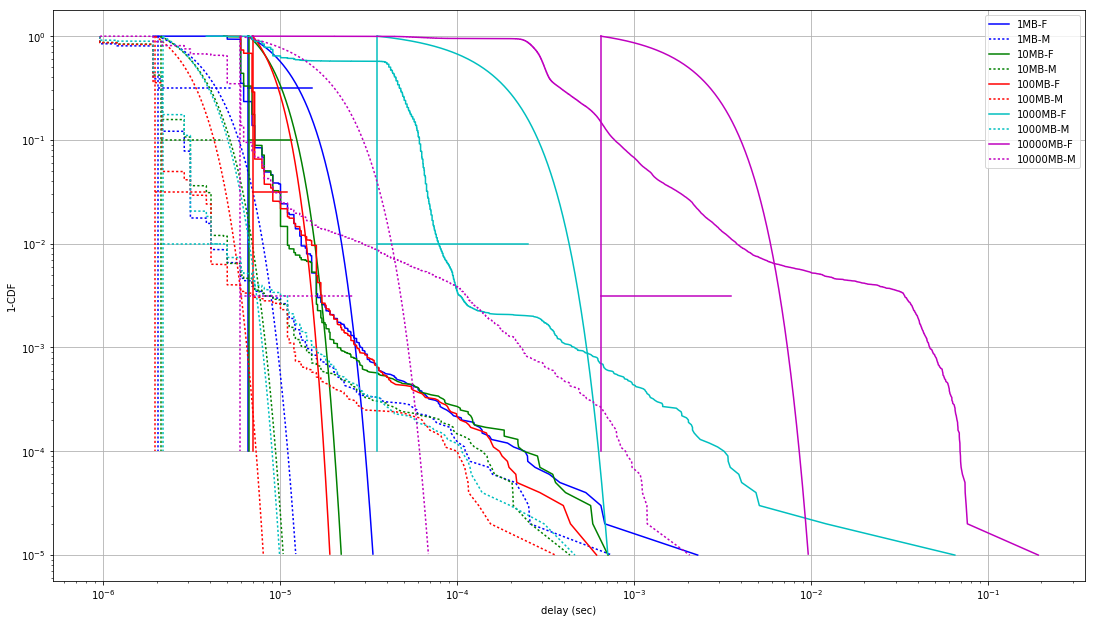

In [8]:
pp = PdfPages('MemoryFigure.pdf')
figure(figsize=(6,4))

Colors='bgrcmyk'  # The colors for the plot
LineStyles=['-',':']
Legends=['F','M']

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5,10.5)

for m_i in range(len(m_list)):
    Color=Colors[m_i % len(Colors)]
    for Type in [0,1]:
        PlotTime(sort(T[Type,m_i]),mean[Type,m_i],std[Type,m_i],
                 Color=Color,LS=LineStyles[Type],Legend=('%dMB-' % m_list[m_i])+Legends[Type],
                 m_i=m_i)

grid()
legend(fontsize='medium')
xlabel('delay (sec)')
ylabel('1-CDF')
pp.savefig()
pp.close()

In [7]:
import time

Line='Consecutive Memory writes'
print Line; stat.write(Line+'\n')
n=1000
r=np.array(range(n))
for m in [1,3,5,7,10,100,1000,10000,100000,1000000]:
    t1=time.time()
    A=np.repeat(r,m)
    t2=time.time()
    tee("array of length %d repeated %d times. total size=%6.3f MB, Time per element= %g" % (n,m,float(n*m)/1000000,(t2-t1)/float(n*m)))
A=[];r=[]
stat.close()

Consecutive Memory writes
array of length 1000 repeated 1 times. total size= 0.001 MB, Time per element= 3.69549e-08
array of length 1000 repeated 3 times. total size= 0.003 MB, Time per element= 1.06494e-08
array of length 1000 repeated 5 times. total size= 0.005 MB, Time per element= 1.54018e-08
array of length 1000 repeated 7 times. total size= 0.007 MB, Time per element= 1.74386e-08
array of length 1000 repeated 10 times. total size= 0.010 MB, Time per element= 1.12057e-08
array of length 1000 repeated 100 times. total size= 0.100 MB, Time per element= 8.26836e-09
array of length 1000 repeated 1000 times. total size= 1.000 MB, Time per element= 7.72595e-09
array of length 1000 repeated 10000 times. total size=10.000 MB, Time per element= 8.19819e-09
array of length 1000 repeated 100000 times. total size=100.000 MB, Time per element= 7.90868e-09
array of length 1000 repeated 1000000 times. total size=1000.000 MB, Time per element= 8.43918e-09


## Observations

* If you write to consecutive locations, you have a per-byte time of around $10^{-8}$ if you jump around you can't do better than $10^{-6}$.
* As you increase the size of the array/file random access speed decreases dramatically, while sequential access speed stays more or less constant.
* The high latency tails are much bigger than what you'd expect from a normal distribution with the same mean and std.

## Impact on Big Data Analytics
* Clock rate is stuck at around 3GHz, and is likely to be stuck there for the forseeable future.
* **Faster** computers / disks / networks are **expensive** 
* The cost-effective solution is often a cluster of many cheap computers, each with many cores and break up the data so that each computer has a small fraction of the data.
* Data-Centers and the "Cloud"

In [1]:
#cleanup
!rm -rf logs stats.txt